In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/indian_liver_patient.csv")
df.shape

(583, 11)

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [6]:
df.rename(columns={'Dataset':'target'},inplace=True)
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1,0.4


In [7]:
le = LabelEncoder()
le.fit(df.Gender.unique())
df['Gender'] = le.transform(df.Gender)
df.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,0.0,1.00,1.00,1.0,1.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [8]:
X = df.drop("target", axis = 1)
y = df["target"]

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_decomposed = pca.transform(X)

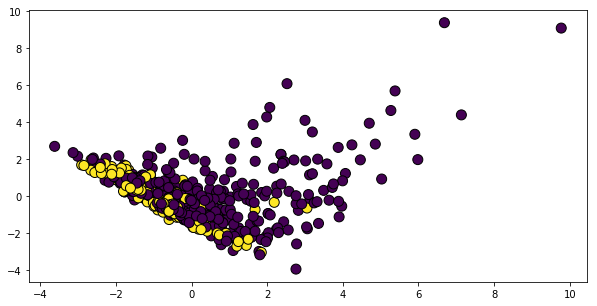

In [13]:
plt.figure( figsize=(10,5))
plt.scatter(X_decomposed[:,0], X_decomposed[:,1], c=y.values.ravel(), edgecolor='black', s=100)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2)
pred_kmeans = kmeans.fit_predict(X_decomposed)

# predict gmm
gmm = GaussianMixture(n_components=2).fit(X_decomposed)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)

Adjusted Rand Score: -0.07110772934445547


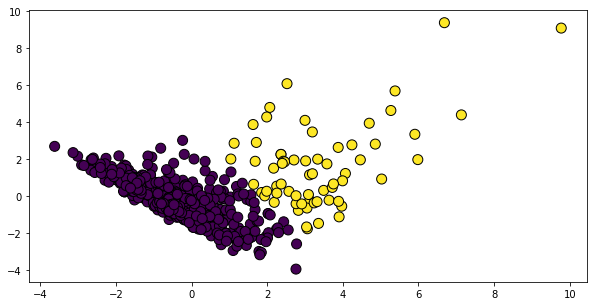

Adjusted Rand Score: -0.036014418236476435


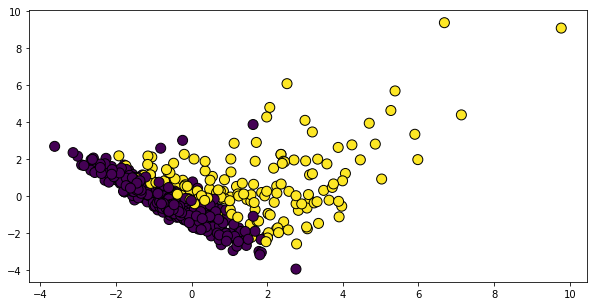

In [15]:
print('Adjusted Rand Score:', adjusted_rand_score(y.values.ravel(), pred_kmeans))
plt.figure( figsize=(10,5))
plt.scatter(X_decomposed[:,0], X_decomposed[:,1], c=pred_kmeans, edgecolor='black', s=100)
plt.show()

print('Adjusted Rand Score:', adjusted_rand_score(y.values.ravel(), pred_gmm))
plt.figure( figsize=(10,5))
plt.scatter(X_decomposed[:,0], X_decomposed[:,1], c=pred_gmm, edgecolor='black', s=100)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=2)
pred_kmeans = kmeans.fit_predict(X)

# predict gmm
gmm = GaussianMixture(n_components=2).fit(X)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)

In [17]:
print('Adjusted Rand Score', adjusted_rand_score(y.values.ravel(), pred_kmeans))
print('Adjusted Rand Score', adjusted_rand_score(y.values.ravel(), pred_gmm))

Adjusted Rand Score -0.07182613319543137
Adjusted Rand Score -0.036014418236476435
